## Titanic Kaggle Competition - Individual Project

# Part 1A: Exploratory Analysis of Titanic Dataset On Training Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/titanic/train.csv') # Train Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
round(train.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
# Any duplicate data in the dataframe?
print("There is {} duplicated values in data frame".format(train.duplicated().sum())) # no duplicate values found

There is 0 duplicated values in data frame


## Compare Relationship Between Passenger Class and Fare and Survival

In [7]:
train.groupby(['Pclass'])['Fare'].max().round(2)
# Note: On average passengers paid a higher fare if you were on 1st class vs the other two classes
# But we will use max values as our threshold to determine fare paid by each passenger based on class

Pclass
1    512.33
2     73.50
3     69.55
Name: Fare, dtype: float64

In [8]:
train.groupby(['Pclass'])['Survived'].count()
# Looks the people on board 2nd class less likely survived compared to 1st and 3rd class passengers

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dropping Irrelavent Features and Eliminate Null Values

## Drop Irrelavent Features

In [10]:
# Drop columns that are not useful for prediction:
# keep columns = ['Sex', 'Age','SibSp, Parch, Fare', 'Cabin','Pclass','Embarked','Survived']

train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [11]:
train.head() #new dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
round(train.describe(),2)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


## Eliminate Null Values

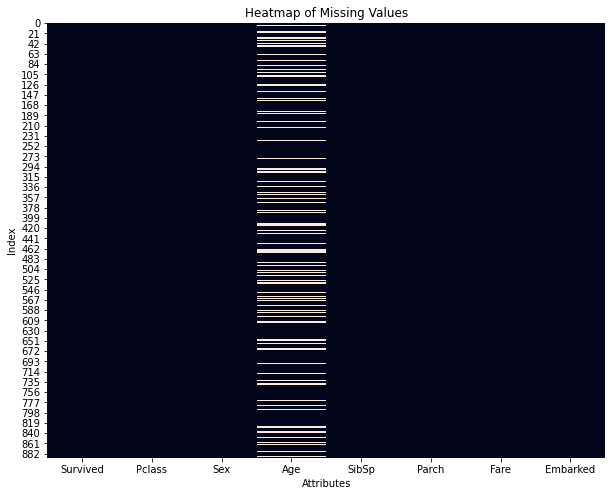

In [14]:
# Create a heatmap to visalize the missing values 
plt.subplots(figsize=(10,8))

sns.heatmap(train.isnull(),cbar = False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Attributes')
plt.ylabel('Index')

plt.show()

In [15]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
train.isnull().sum(axis = 0)
# Looks like Age = 179 null values
# Cabin = 689
# and others have a few nulls

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Impute Missing Values for Age Feature

In [17]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
train.isnull().sum(axis = 0)
# Looks like Age = 179 null values
# Cabin = 689
# and others have a few nulls

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
# Replace nulls with for age with median to fill missed data on 'Age'
train.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [19]:
def set_null_age(cols):
    Age,Pclass,Sex = cols
    if pd.isnull(Age):
        if Pclass == 1: 
            if Sex == 'female':
                return 35
            else:
                return 40
        elif Pclass == 2: 
            if Sex == 'female':
                return 28
            else:
                return 30         
        elif Pclass == 3: 
            if Sex == 'female':
                return 22
            else:
                return 25  
    else:
        return Age

In [20]:
train['Age']= train[['Age', 'Pclass', 'Sex']].apply(set_null_age, axis = 1)

In [21]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
train.isnull().sum(axis = 0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Impute Missing Values for Embarked Feature 

In [22]:
train[pd.isnull(train.Embarked)] # records where embarked is null

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [23]:
train.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [24]:
train.loc[(61,829), 'Embarked'] = 'S' #replace with S, as it is most frequent value (mode)

## Eliminate Remaining Missing Values By Dropping 

In [25]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
train[pd.isnull(train.Survived)] # records where embarked is null

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [27]:
train.dropna(axis = 0,how = 'any', inplace = True) # drop all records where nan appears at least in one of the features

In [28]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

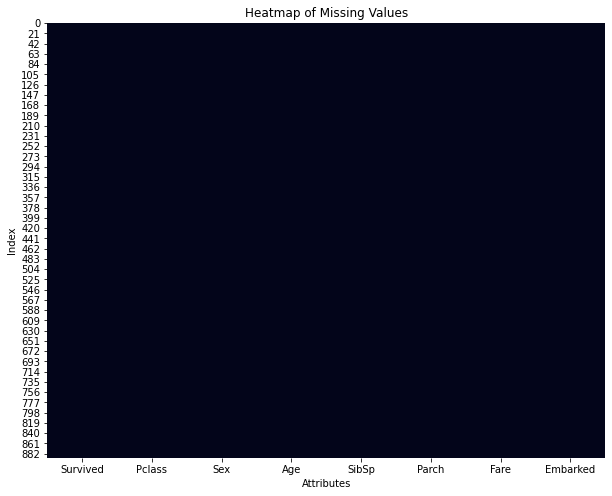

In [29]:
# Create a heatmap to visalize the missing values 
plt.subplots(figsize=(10,8))

sns.heatmap(train.isnull(),cbar = False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Attributes')
plt.ylabel('Index')

plt.show() # all null values eliminated 

In [30]:
train.info() # total 891 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


## Visualizations - Post Preprocessing

### Survival Counts Based on Sex
Looks like more males perished compared to females

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


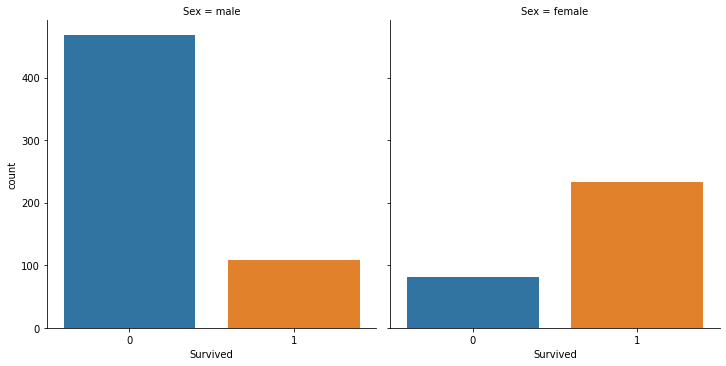

In [31]:
sns.factorplot(x='Survived',col='Sex',kind='count',data=train)

### Survival Counts Based on Passenger Class
Looks like most people in passenger class three did not survive compared to the other two classes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

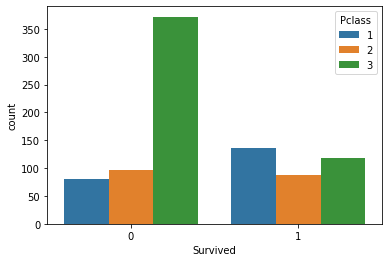

In [32]:
sns.countplot(x='Survived',hue='Pclass',data=train)

### Number of Siblings/Spouse and Number of Parents/Grandparents on board

Looks like most passengers came on board the titanic alone

<AxesSubplot:xlabel='Parch', ylabel='count'>

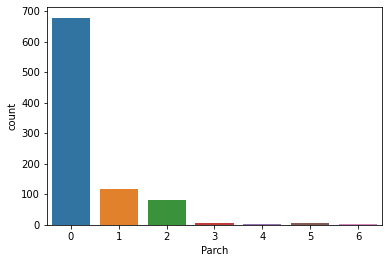

In [33]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

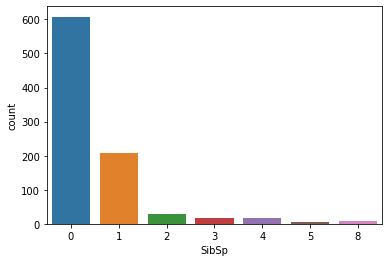

In [34]:
sns.countplot(x='SibSp',data=train)

## Compare Relationship Between Passenger Class and Fare and Survival

In [35]:
train.groupby(['Pclass'])['Fare'].max().round(2)
# Note: On average passengers paid a higher fare if you were on 1st class vs the other two classes
# But we will use max values as our threshold to determine fare paid by each passenger based on class

Pclass
1    512.33
2     73.50
3     69.55
Name: Fare, dtype: float64

In [36]:
train.groupby(['Pclass'])['Survived'].count()
# Looks the people on board 2nd class less likely survived compared to 1st and 3rd class passengers

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Convert the values in the rest of the columns to int

In [38]:
#titanic['Survived'] = titanic['Survived'].astype(int)
#titanic['SibSp'] = titanic['SibSp'].astype(int)
#titanic['Parch'] = titanic['Parch'].astype(int)
#titanic['Pclass'] = titanic['Pclass'].astype(int)

# Hot-Encode Values in Sex, Embarked, Pclass, SibSp, and Parch Features

In [39]:
from sklearn.preprocessing import OneHotEncoder

## First Map Values for Siblings and Parents Feature

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
train.loc[((train.SibSp < 1 )) ,'SibSp'] =  0 # no siblings = 0
train.loc[((train.Parch < 1 )) ,'Parch'] =  0 # no parents = 0

train.loc[((train.SibSp >= 1 )) ,'SibSp'] =  1 # 1 or more siblings = 1
train.loc[((train.Parch >= 1 )) ,'Parch'] =  1 # 1 or more parents = 1

In [42]:
# we will use 1, 2, 3 insteed of S, Q, C

#S = Southampton => 1
# Q = Queenstown => 2
# C = Cherbourg => 3

#titanic['Embarked'] = titanic['Embarked'].map({"S": 1, "Q": 2, "C": 3})

In [43]:
# male = 0
# female = 1
#titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Compare Relationship Between  Fare and Passenger Class

In [45]:
train.groupby(['Pclass'])['Fare'].max().round(2)
# Note: On average passengers paid a higher fare if you were on 1st class vs the other two classes
# But we will use max values as our threshold to determine fare paid by each passenger based on class

Pclass
1    512.33
2     73.50
3     69.55
Name: Fare, dtype: float64

## Hot-Encode Embarked, Siblings, Parent , Sex , Pclass Features and Survived

In [46]:
#titanic.columns

In [47]:
#columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#for col in columns:
    #X_train = pd.concat([X_train, pd.get_dummies(data_train[col])], axis =1)
    #X_test = pd.concat([X_test, pd.get_dummies(data_test[col])], axis =1)
    
    #titanic = pd.concat([titanic, pd.get_dummies(titanic[col], drop_first = True)], axis =1)
    #X_test_onehot = pd.concat([X_test_onehot, pd.get_dummies(X_test_onehot[col], drop_first = True)], axis =1)

In [48]:
#titanic = titanic.drop(columns, axis=1)
#X_test_onehot = X_test_onehot.drop(columns, axis=1)

In [49]:
#titanic.head()

## Convert the values in the rest of the columns to int

In [50]:
#titanic['Survived'] = titanic['Survived'].astype(int)
#titanic['SibSp'] = titanic['SibSp'].astype(int)
#titanic['Parch'] = titanic['Parch'].astype(int)
#titanic['Pclass'] = titanic['Pclass'].astype(int)

## Hot- Encode Categorical Values and Scale Continous Values and then Concat

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

In [51]:
#titanic = pd.get_dummies(titanic, columns=['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked', 'Age', 'Fare'],drop_first=True)
#titanic.head(10)

# I have encoded Fare and Age (which are continuous, NOT categorical, variables)

In [52]:

#['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked'] # categorical values are hot-encoded
columns_to_scale  = ['Age', 'Fare'] # numerical values scaled

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(train[columns_to_scale]) 
encoded_columns =  ohe.fit_transform(train[columns_to_encode])

#print(scaled_columns[1])
#print(encoded_columns[1])


In [53]:
# Concatenate (Column-Bind) Processed Columns Back Together
processed_data_train = np.concatenate([scaled_columns, encoded_columns], axis=1)
print(processed_data_train[0]) # scaled + encoded 
 
# #['Age', 'Fare', Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']

train.head()

[-0.53719199 -0.50244517  1.          0.          0.          0.
  1.          0.          1.          0.          1.          1.
  0.          0.          0.          1.        ]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
# Creating pandas dataframe from numpy array
#['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']
#titanic_train = pd.DataFrame({'Age': processed_data[:, 0], 
     #                         'Fare': processed_data[:, 1],
      #                        'Survived_No': processed_data[:, 2],
       #                       'Survived_Yes': processed_data[:, 3],
        #                      'Pclass1': processed_data[:, 4],
         #                     'Pclass2': processed_data[:, 5],
          #                    'Pclass3': processed_data[:, 6],
           #                   'Female': processed_data[:, 7],
            #                  'Male': processed_data[:, 8],
             #                'Sib_No': processed_data[:, 9],
              #               'Sib_Yes': processed_data[:, 10],
               #              'Par_No': processed_data[:, 11],
                #             'Par_Yes': processed_data[:, 12],
                 #            'Embarked_C': processed_data[:, 13],
                  #           'Embarked_Q': processed_data[:, 14],
                   #          'Embarked_S': processed_data[:, 15]})
                             


#titanic_train.head()

In [55]:
# Creating pandas dataframe from numpy array
#['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']
titanic_train = pd.DataFrame({'Age': processed_data_train[:, 0], 
                              'Fare': processed_data_train[:, 1],
                              'Survived_Yes': processed_data_train[:, 3],                             
                              'Pclass2': processed_data_train[:, 5],
                              'Pclass3': processed_data_train[:, 6],                         
                              'Male': processed_data_train[:, 8],                           
                             'Sib_Yes': processed_data_train[:, 10],                          
                             'Par_Yes': processed_data_train[:, 12],                      
                             'Embarked_Q': processed_data_train[:, 14],
                             'Embarked_S': processed_data_train[:, 15]})

titanic_train.head() # Final Training Dataset for NN

,Age,Fare,Survived_Yes,Pclass2,Pclass3,Male,Sib_Yes,Par_Yes,Embarked_Q,Embarked_S
0,-0.537192,-0.502445,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.667275,0.786845,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.236075,-0.488854,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.441438,0.420730,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.441438,-0.486337,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# Part 1B: Exploratory Analysis of Titanic Dataset On Test Data

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
test = pd.read_csv('../input/titanic/test.csv') # Test Data

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [60]:
round(test.describe(),2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


In [61]:
# Any duplicate data in the dataframe?
print("There is {} duplicated values in data frame".format(test.duplicated().sum())) # no duplicate values found

There is 0 duplicated values in data frame


# Dropping Irrelavent Features and Eliminate Null Values

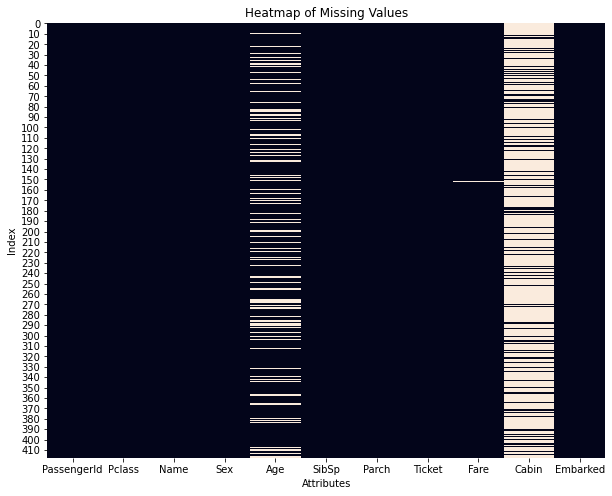

In [62]:
# Create a heatmap to visalize the missing values 
plt.subplots(figsize=(10,8))

sns.heatmap(test.isnull(),cbar = False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Attributes')
plt.ylabel('Index')

plt.show()

In [63]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
test.isnull().sum(axis = 0)
# Looks like Age = 179 null values
# Cabin = 689
# and others have a few nulls

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Drop Irrelavent Features

In [65]:
# Drop columns that are not useful for prediction:
# keep columns = ['Sex', 'Age','SibSp, Parch, Fare', 'Cabin','Pclass','Embarked','Survived']

test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [66]:
test.head() #new dataframe

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [68]:
round(test.describe(),2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


## Impute Missing Values for Age Feature

In [69]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
test.isnull().sum(axis = 0)
# Looks like Age = 179 null values
# Cabin = 689
# and others have a few nulls

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [70]:
# Replace nulls with for age with median to fill missed data on 'Age'
test.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

In [71]:
def set_null_age(cols):
    Age,Pclass,Sex = cols
    if pd.isnull(Age):
        if Pclass == 1: 
            if Sex == 'female':
                return 35
            else:
                return 40
        elif Pclass == 2: 
            if Sex == 'female':
                return 28
            else:
                return 30         
        elif Pclass == 3: 
            if Sex == 'female':
                return 22
            else:
                return 25  
    else:
        return Age

In [72]:
test['Age']= test[['Age', 'Pclass', 'Sex']].apply(set_null_age, axis = 1)

In [73]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
test.isnull().sum(axis = 0)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

## Compare Relationship Between Passenger Class and Fare

In [74]:
test.groupby(['Pclass'])['Fare'].mean().round(2)
# Note: On average passengers paid a higher fare if you were on 1st class vs the other two classes
# But we will use max values as our threshold to determine fare paid by each passenger based on class

Pclass
1    94.28
2    22.20
3    12.46
Name: Fare, dtype: float64

In [75]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Impute Missing Values for Fare Feature 

In [76]:
test[pd.isnull(test.Fare)] # records where embarked is null

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [77]:
test.loc[(152), 'Fare'] = '12.46' #replace with average fare for Pclass 3

## Eliminate Remaining Missing Values By Dropping 

In [78]:
# To view a missing values in a tabluar format and the percentage of nulls that make up the whole dataset:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

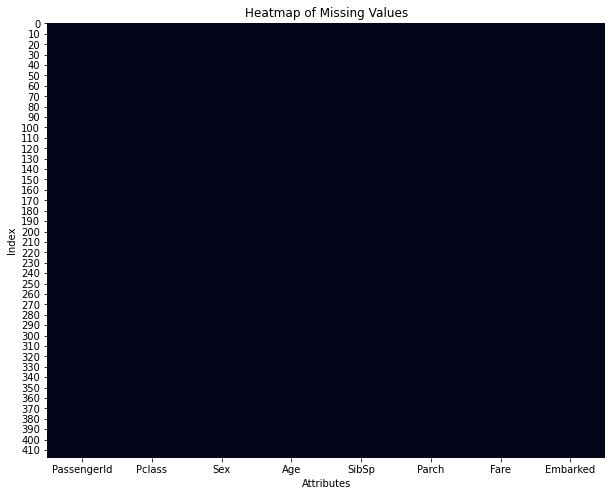

In [79]:
# Create a heatmap to visalize the missing values 
plt.subplots(figsize=(10,8))

sns.heatmap(test.isnull(),cbar = False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Attributes')
plt.ylabel('Index')

plt.show() # all null values eliminated 

In [80]:
test.info() # total 891 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    object 
 7   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 26.2+ KB


# Hot-Encode Values in Sex, Embarked, Pclass, SibSp, and Parch Features

In [81]:
from sklearn.preprocessing import OneHotEncoder

## First Map Values for Siblings and Parents Feature

In [82]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [83]:
test.loc[((test.SibSp < 1 )) ,'SibSp'] =  0 # no siblings = 0
test.loc[((test.Parch < 1 )) ,'Parch'] =  0 # no parents = 0

test.loc[((test.SibSp >= 1 )) ,'SibSp'] =  1 # 1 or more siblings = 1
test.loc[((test.Parch >= 1 )) ,'Parch'] =  1 # 1 or more parents = 1

In [84]:
# we will use 1, 2, 3 insteed of S, Q, C

#S = Southampton => 1
# Q = Queenstown => 2
# C = Cherbourg => 3

#titanic['Embarked'] = titanic['Embarked'].map({"S": 1, "Q": 2, "C": 3})

In [85]:
# male = 0
# female = 1
#titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

In [86]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Hot-Encode Embarked, Siblings, Parent , Sex , Pclass Features and Survived

In [87]:
#titanic.columns

In [88]:
#columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#for col in columns:
    #X_train = pd.concat([X_train, pd.get_dummies(data_train[col])], axis =1)
    #X_test = pd.concat([X_test, pd.get_dummies(data_test[col])], axis =1)
    
    #titanic = pd.concat([titanic, pd.get_dummies(titanic[col], drop_first = True)], axis =1)
    #X_test_onehot = pd.concat([X_test_onehot, pd.get_dummies(X_test_onehot[col], drop_first = True)], axis =1)

In [89]:
#titanic = titanic.drop(columns, axis=1)
#X_test_onehot = X_test_onehot.drop(columns, axis=1)

In [90]:
#titanic.head()

## Convert the values in the rest of the columns to int

In [91]:
#titanic['Survived'] = titanic['Survived'].astype(int)
#titanic['SibSp'] = titanic['SibSp'].astype(int)
#titanic['Parch'] = titanic['Parch'].astype(int)
#titanic['Pclass'] = titanic['Pclass'].astype(int)

## Hot- Encode Categorical Values and Scale Continous Values and then Concat

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

In [92]:
#titanic = pd.get_dummies(titanic, columns=['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked', 'Age', 'Fare'],drop_first=True)
#titanic.head(10)

# I have encoded Fare and Age (which are continuous, NOT categorical, variables)

In [93]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.225,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,1,0,24.15,S


In [94]:
#test['PassengerId']

In [95]:
#['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['Pclass', 'Sex','SibSp', 'Parch','Embarked'] # categorical values are hot-encoded
columns_to_scale  = ['Age', 'Fare'] # numerical values scaled

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(test[columns_to_scale]) 
encoded_columns =  ohe.fit_transform(test[columns_to_encode])

#print(scaled_columns[1])
#print(encoded_columns[1])

In [96]:
# Concatenate (Column-Bind) Processed Columns Back Together
processed_data_test = np.concatenate([scaled_columns, encoded_columns], axis=1)
print(processed_data_test[0]) # scaled + encoded 
 
# #['Age', 'Fare', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']

test.head()

[ 0.39578146 -0.49731094  0.          0.          1.          0.
  1.          1.          0.          1.          0.          0.
  1.          0.        ]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [97]:
# Creating pandas dataframe from numpy array
#['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']
#titanic_train = pd.DataFrame({'Age': processed_data[:, 0], 
     #                         'Fare': processed_data[:, 1],
        #                      'Pclass1': processed_data[:, 2],
         #                     'Pclass2': processed_data[:, 3],
          #                    'Pclass3': processed_data[:, 4],
           #                   'Female': processed_data[:, 5],
            #                  'Male': processed_data[:, 6],
             #                'Sib_No': processed_data[:, 7],
              #               'Sib_Yes': processed_data[:, 8],
               #              'Par_No': processed_data[:, 9],
                #             'Par_Yes': processed_data[:, 10],
                 #            'Embarked_C': processed_data[:, 11],
                  #           'Embarked_Q': processed_data[:, 12],
                   #          'Embarked_S': processed_data[:, 13]})
                             


#titanic_train.head()

In [98]:
# Creating pandas dataframe from numpy array
#['Pclass', 'Sex','SibSp', 'Parch','Embarked']
titanic_test = pd.DataFrame({'Age': processed_data_test[:, 0], 
                              'Fare': processed_data_test[:, 1],                            
                              'Pclass2': processed_data_test[:, 3],
                              'Pclass3': processed_data_test[:, 4],                         
                              'Male': processed_data_test[:, 6],                           
                             'Sib_Yes': processed_data_test[:, 8],                          
                             'Par_Yes': processed_data_test[:, 10],                      
                             'Embarked_Q': processed_data_test[:, 12],
                             'Embarked_S': processed_data_test[:, 13]})

titanic_test.head() # final test data for NN

,Age,Fare,Pclass2,Pclass3,Male,Sib_Yes,Par_Yes,Embarked_Q,Embarked_S
0,0.395781,-0.497311,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.362795,-0.512175,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.523211,-0.463999,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.184427,-0.482373,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.571232,-0.417392,0.0,1.0,0.0,1.0,1.0,0.0,1.0


# Part 2: Neural Network 

In [99]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.models import Sequential

In [100]:
titanic_train.head()

,Age,Fare,Survived_Yes,Pclass2,Pclass3,Male,Sib_Yes,Par_Yes,Embarked_Q,Embarked_S
0,-0.537192,-0.502445,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.667275,0.786845,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.236075,-0.488854,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.441438,0.420730,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.441438,-0.486337,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [101]:
titanic_test.head()

,Age,Fare,Pclass2,Pclass3,Male,Sib_Yes,Par_Yes,Embarked_Q,Embarked_S
0,0.395781,-0.497311,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.362795,-0.512175,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.523211,-0.463999,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.184427,-0.482373,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.571232,-0.417392,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [102]:
#Note that because the dataset does not provide labels for their testing-set, 
#we need to use the predictions on the training set to compare the algorithms with each other.
#Later on, we will use cross validation.

X_train = titanic_train.drop(['Survived_Yes'], axis=1)
Y_train = titanic_train[['Survived_Yes']]
X_test  = titanic_test

# We will predict y-test labels using X_test data after training our NN model

In [103]:
print("Shape of X_train is", X_train.shape)
print("Shape of Y_train is", Y_train.shape)
print("Shape of X_test is", X_test.shape)

Shape of X_train is (891, 9)
Shape of Y_train is (891, 1)
Shape of X_test is (418, 9)


In [104]:
print("Shape of X_train is", X_train.shape[1:])
print("Shape of X_test is", X_test.shape[1:])

Shape of X_train is (9,)
Shape of X_test is (9,)


### Prediction using DNN 

In [105]:
# Create a DNN model
model = Sequential([
    layers.Dense(32,activation = "relu",input_shape= X_train.shape[1:]),
    layers.Dropout(0.2),
    layers.Dense(32,activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(10,activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1,activation = "sigmoid")]) #binary classification

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [107]:
from numpy.random import seed
seed(1)

# Set Optimizer and learning rate
from keras.optimizers import Adam
from keras.optimizers import SGD
opt = Adam(lr=0.1)

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

In [108]:
### TRAIN DATA with MODEL 

history = model.fit(X_train, Y_train, batch_size =128, epochs=10,
                    validation_split = 0.20) 
# batch size defaults to 32, but has been changed to 128

Epoch 1/10
6/6 [==============================] - 1s 124ms/step - loss: 0.6875 - accuracy: 0.5714 - val_loss: 0.5122 - val_accuracy: 0.7151
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.5523 - accuracy: 0.7617 - val_loss: 0.4710 - val_accuracy: 0.8268
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 0.5418 - accuracy: 0.7598 - val_loss: 0.4031 - val_accuracy: 0.8380
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 0.5062 - accuracy: 0.7805 - val_loss: 0.4015 - val_accuracy: 0.8603
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 0.5241 - accuracy: 0.7953 - val_loss: 0.3994 - val_accuracy: 0.8547
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 0.4854 - accuracy: 0.8072 - val_loss: 0.4208 - val_accuracy: 0.8380
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 0.4680 - accuracy: 0.8037 - val_loss: 0.3919 - val_accuracy: 0.8603
Epoch 8/10
6/6 [==========

In [109]:
print (history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [110]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100)) # validation accuracy using training data


val_accuracy: 83.52%


In [111]:
val_loss = np.mean(history.history['val_loss'])
print('val_loss:', val_loss)# validation loss using training data

val_loss: 0.42054479420185087


### Predict y-test labels using trained DNN model with test data

In [112]:
# calculate predictions
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solutions_my_y_preds = test[['PassengerId', 'Survived']]

In [113]:
solutions_my_y_preds.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [114]:
len(solutions_my_y_preds)

418

In [115]:
# saving the dataframe 
#solutions_my_y_preds.to_csv(r'.../Desktop/DATA 255-DeepLearning/Kaggle_Competition/Titanic_Solution.csv', index=False) 

### Additional prediction using Perceptron Model

In [116]:
from sklearn.linear_model import Perceptron # Perceptron Model
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [117]:
print(acc_perceptron) # Training Accuracy Score using Perceptron model

76.54


In [118]:
Y_pred_rounded = Y_pred.round()
Y_pred_rounded

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1.